# Forecasting Non-Performing Loans (NPLs)

### Importing Dependencies

In [103]:
import pandas as pd
from pathlib import Path

In [104]:
df=pd.read_csv(Path('./Data/df_clean2.csv'))
df.head()

,DATE,GDP,WTI,U_RATE,X_RATE,CPI,CR_GROWTH,NPL,M2,N_RESV,...,PRIME,T_PROV,S_PROV,M2_YYC,N_RESV_YYC,O_PROD_PC,N_GAS_PC,CR_GROWTH_YY,INFL,CEM_SALES_PC
0,Mar-95,2.4,18.4,18.1,5.9468,31.30,7072.3,9.0,9986.7,338.5,...,16.0,73.9,56.1,3.46,-1597.79,-0.08,2.75,5.65,5.3,13.97
1,Jun-95,4.9,19.4,16.5,5.9466,31.87,7188.8,9.9,9934.4,358.9,...,15.0,66.8,50.5,6.85,-753.73,0.63,3.34,5.65,5.3,8.50
2,Sep-95,3.6,17.8,17.8,5.9240,32.23,7169.1,9.4,9885.9,360.0,...,15.0,63.0,50.7,6.18,3429.41,-0.51,4.71,5.65,5.7,2.41
3,Dec-95,4.2,18.2,16.3,5.9694,32.40,7188.3,10.2,10453.0,346.2,...,14.0,51.1,42.2,3.49,32.19,-1.38,5.13,5.65,3.8,8.87
4,Mar-96,4.2,19.8,17.1,5.9995,32.43,7249.7,10.9,9944.2,331.2,...,15.5,44.4,37.5,-0.43,-2.16,1.50,14.60,2.51,3.5,4.18


#### Replace missing CR_GROWTH_YY values with median 

In [105]:
import seaborn as sns

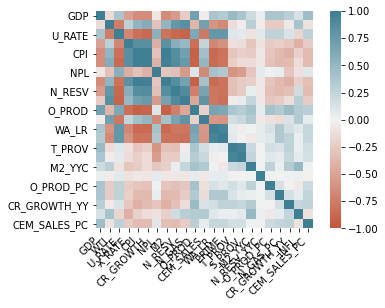

In [106]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [107]:
df.corr()

,GDP,WTI,U_RATE,X_RATE,CPI,CR_GROWTH,NPL,M2,N_RESV,N_GAS,...,PRIME,T_PROV,S_PROV,M2_YYC,N_RESV_YYC,O_PROD_PC,N_GAS_PC,CR_GROWTH_YY,INFL,CEM_SALES_PC
GDP,1.000000,-0.154950,0.393632,-0.524561,-0.636480,-0.631087,-0.075548,-0.647044,-0.546367,-0.247251,...,0.331532,0.481335,0.390703,0.191458,0.033756,0.394595,0.390648,0.312032,0.147432,0.463552
WTI,-0.154950,1.000000,-0.748876,0.293952,0.530543,0.590138,-0.301137,0.530255,0.788523,0.847394,...,-0.662355,-0.127699,-0.034869,0.309332,-0.046162,-0.250046,-0.243752,-0.054313,0.399573,-0.086341
U_RATE,0.393632,-0.748876,1.000000,-0.667845,-0.811753,-0.860671,0.574081,-0.799463,-0.874293,-0.896078,...,0.784725,0.099273,0.075995,-0.094152,0.081047,0.272793,0.269314,0.118772,-0.177668,0.288258
X_RATE,-0.524561,0.293952,-0.667845,1.000000,0.852861,0.846680,-0.432810,0.834105,0.581959,0.486106,...,-0.607876,-0.116844,-0.118909,-0.277983,-0.091966,-0.231954,-0.224840,-0.261629,-0.402651,-0.253812
CPI,-0.636480,0.530543,-0.811753,0.852861,1.000000,0.982284,-0.308986,0.996991,0.862597,0.696635,...,-0.803288,-0.283397,-0.219819,-0.236338,-0.069062,-0.274947,-0.354118,-0.419045,-0.204548,-0.332261
CR_GROWTH,-0.631087,0.590138,-0.860671,0.846680,0.982284,1.000000,-0.399393,0.976350,0.882271,0.762525,...,-0.793709,-0.219743,-0.141767,-0.148067,-0.070787,-0.310198,-0.361607,-0.349826,-0.131830,-0.341452
NPL,-0.075548,-0.301137,0.574081,-0.432810,-0.308986,-0.399393,1.000000,-0.274860,-0.316535,-0.544567,...,0.364581,-0.595136,-0.533078,-0.272483,0.063831,0.008305,0.044194,-0.274598,-0.113161,0.098957
M2,-0.647044,0.530255,-0.799463,0.834105,0.996991,0.976350,-0.274860,1.000000,0.863595,0.682426,...,-0.799770,-0.303341,-0.230097,-0.223359,-0.068193,-0.266275,-0.362881,-0.426767,-0.214900,-0.321461
N_RESV,-0.546367,0.788523,-0.874293,0.581959,0.862597,0.882271,-0.316535,0.863595,1.000000,0.889337,...,-0.800591,-0.313631,-0.227365,0.039990,-0.065199,-0.315212,-0.355128,-0.317595,0.186029,-0.341293
N_GAS,-0.247251,0.847394,-0.896078,0.486106,0.696635,0.762525,-0.544567,0.682426,0.889337,1.000000,...,-0.816368,-0.038913,0.047296,0.242394,-0.069487,-0.268849,-0.237732,-0.118670,0.307265,-0.249325


### Developing Model

In [108]:
i=df[(df["U_RATE"].isnull())].index
df1=df.drop(i)

In [109]:
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Based on the correlation matrix in NLP_Forecast1.ipynb we will go with the following variables first

In [110]:
x_cols = [i for i in df.columns if i not in ('DATE', 'NPL','T_PROV', 'S_PROV', 'O_PROD_PC', 'CPI', 'N_RESV_YYC',
                                            'INFL', 'N_GAS', 'O_PROD', 'N_RESV', 'WA_LR', 'PRIME', 'CEM_SALES', 'CEM_SALES_PC',
                                            'N_GAS_PC', 'M2', 'CR_GROWTH')]
X = df1[x_cols]

# X=df[['GDP']].values.reshape(-1, 1)
y=df1['NPL']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Scaling the Data

In [112]:
# from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler()

# X_scaler=scaler.fit(X_train)

# X_train_scaled=X_scaler.transform(X_train)
# X_test_scaled=X_scaler.transform(X_test)

### Testing Model

In [113]:
# Import Dependencies
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [114]:
results=OLS(y_test, add_constant(X_test)).fit()

In [115]:
variables=results.model.exog

In [116]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NPL   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     14.91
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           2.51e-07
Time:                        22:04:41   Log-Likelihood:                -47.363
No. Observations:                  33   AIC:                             108.7
Df Residuals:                      26   BIC:                             119.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.4837     11.865      1.895      0.069      -1.905      46.873
GDP             -0.1872      0.044     -4.284      0.000      -0.277      -0.097
WTI              0.0587      0.013      4.648      0.000       0.033       0.085
U_RATE           0.5382      0.097      5.564      0.000       0.339       0.737
X_RATE          -3.7330      1.743     -2.142      0.042      -7.316      -0.150
M2_YYC          -0.0858      0.032     -2.682      0.013      -0.152      -0.020
CR_GROWTH_YY    -0.0256      0.023     -1.093      0.285      -0.074       0.023
==============================================================================
Omnibus:                        3.741   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                2.443
Skew:                          -0.626   Prob(JB):                        0.295
Kurtosis:                       3.457   Cond. No.                     3.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Regression Diagnostics

#### Linearity

In [117]:
import numpy as np

In [118]:
y_pred_test=results.predict()

In [119]:
import matplotlib.pyplot as plt

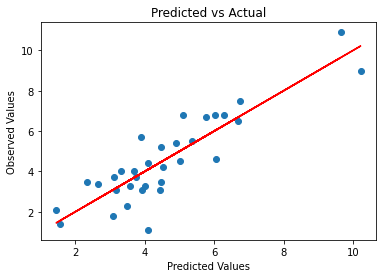

In [120]:
plt.plot(y_pred_test, y_test, 'o')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
m, b = np.polyfit(y_pred_test, y_test, 1)
g=plt.plot(y_pred_test, m*y_pred_test+b, color='red')


g

#### Normality of Error Terms

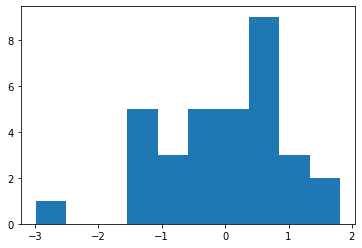

In [121]:
plt.hist(results.resid)
plt.show()

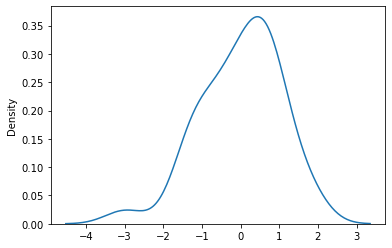

In [122]:
sns.kdeplot(results.resid)
plt.show()

In [123]:
from scipy.stats import shapiro
stat, p = shapiro(results.resid)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.961, p=0.276


#### Multicollinearity Among Predictors

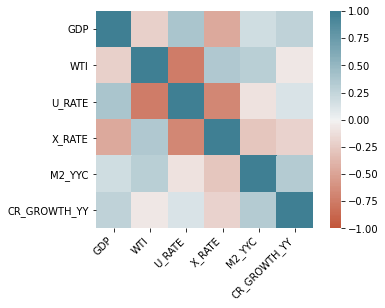

In [124]:
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
list1=X.columns
list2=['CONST']
list2.extend(list1)
print(list2)

['CONST', 'GDP', 'WTI', 'U_RATE', 'X_RATE', 'M2_YYC', 'CR_GROWTH_YY']


In [127]:
vif_data = pd.DataFrame()
# vif_data['feature']=X.columns.values
vif_data['feature']=list2
vif_data['VIF']=[variance_inflation_factor(variables, i) for i in range((variables.shape[1]))]
# vif_data['VIF']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        feature          VIF
0         CONST  3542.911890
1           GDP     1.480758
2           WTI     3.273968
3        U_RATE     5.098318
4        X_RATE     2.783926
5        M2_YYC     1.618786
6  CR_GROWTH_YY     1.415779


### Testing for No Autocorrelation in Errors

#### Observing the Durbin-Watson Statistic

#### Homoscedasticity

In [128]:
data=[df1['DATE'], df1['NPL']]
df2=pd.concat(data, axis=1)
df2['Time_Period']=range(1, len(df2)+1)

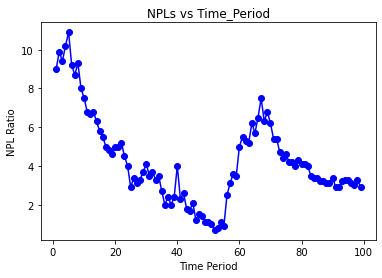

In [129]:
plt.plot(df2.Time_Period, df2.NPL, 'bo-')
plt.title('NPLs vs Time_Period')
plt.xlabel('Time Period')
plt.ylabel('NPL Ratio')
plt.show()

In [130]:
# scaler=StandardScaler()

# X1_scaler=scaler.fit(X)
# X1_scaled=X1_scaler.transform(X)

results1=OLS(y, add_constant(X)).fit()
df2['Residuals']=results1.resid

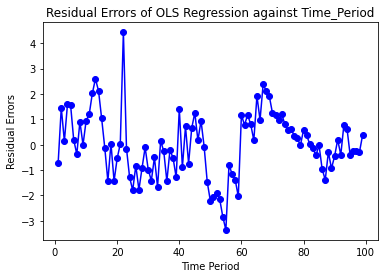

In [131]:
plt.plot(df2.Time_Period, df2.Residuals, 'bo-')
plt.title('Residual Errors of OLS Regression against Time_Period')
plt.xlabel('Time Period')
plt.ylabel('Residual Errors')
plt.show()

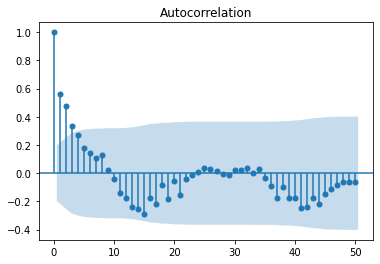

In [132]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2.Residuals, lags=50)
plt.show()

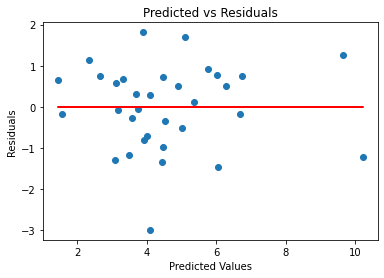

In [133]:
plt.plot(y_pred_test, results.resid, 'o')
plt.title('Predicted vs Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
m,b = np.polyfit(y_pred_test, results.resid, 1)

plt.plot(y_pred_test, m*y_pred_test+b, color='red')
plt.show()

In [134]:
import statsmodels.stats.api as sms
test=sms.het_breuschpagan(results.resid, results.model.exog)
print(test)

(5.8661790265778, 0.4383466944887028, 0.9368422213764019, 0.48574186471712244)


#### Calculating Mean Squared Error for Multivariate Linear Regression Model NPLs

In [135]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(y_test, y_pred_test)
print(a)

1.0331244160273658


In [136]:
print(np.sqrt(a))

1.01642728024555
